In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
#Начальные данные
# ksi = 2/9
# A = 2/15
# B = 3/14

ksi = 9/14
A = 5/14
B = 7/15

eps = 10**(-4)
rho = 10**(-5)
s = 2

c2 = ksi
a21 = c2
b2 = 1/(2*c2)
b1 = 1-1/(2*c2)

x0 = 0
xk = np.pi

y10 = B*np.pi
y20 = A*np.pi

counter = 0

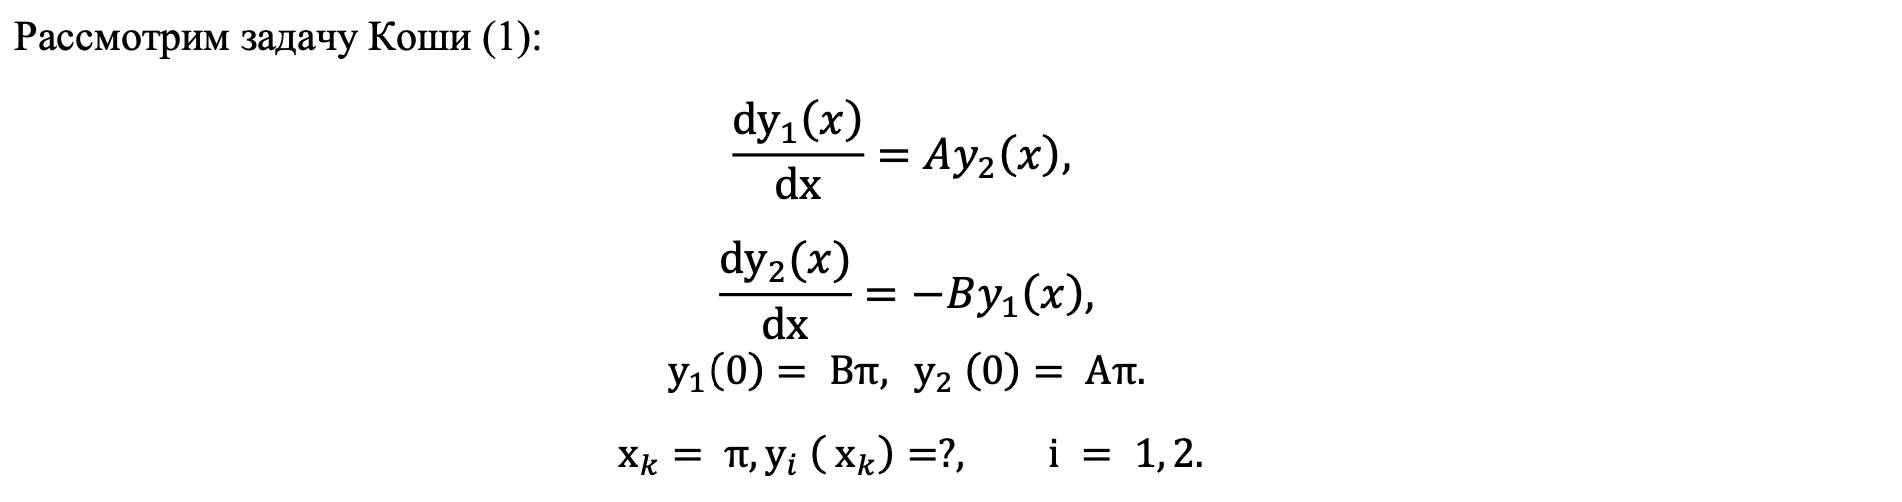

y1 = 1.357812280993508
y2 = -1.2877734484350638


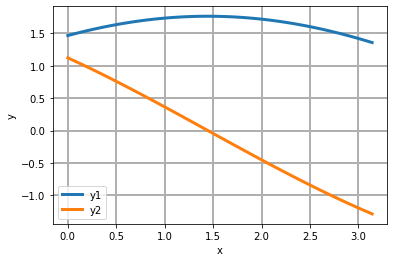

In [3]:
#Нахождение точного значения 
def odes(y, x):
    Y1 = y[0]
    Y2 = y[1]
    
    dY1dx = A*Y2
    dY2dx = -B*Y1
    
    return [dY1dx, dY2dx]

#Начальные условия
init_cond = [y10, y20]

x = np.linspace(0, np.pi, 50)
y = odeint(odes, init_cond, x)
Y1 = y[:, 0]
Y2 = y[:, 1]

#Точное решение
print('y1 =', Y1[-1])
print('y2 =', Y2[-1])

plt.grid(linewidth = 2)
plt.xlabel('x')
plt.ylabel('y')
line1 = plt.plot(x, Y1, label='y1', linewidth = 3)
line2 = plt.plot(x, Y2, label='y2', linewidth = 3)
plt.legend()
plt.show()

## Часть №1. Расчетные схемы метода Рунге-Кутты с постоянным шагом

In [4]:
#Функции правых частей уравнений
def func(num, y_prev):
    global counter
    counter+=1
    if num == 1:
        return A*y_prev
    if num == 2:
        return -B*y_prev

In [5]:
#Нахождение корректирующих коэффициентов k
def k(num, h, y):
    if num == 11:
        return h*func(1, y)
    
    if num == 21:
        return h*func(2, y)
    
    if num == 12:
        return h*func(1, y+a21*k(21, h, y))
    
    if num == 22:
        return h*func(2, y+a21*k(11, h, y))

In [6]:
#Выбор начального шага
def first_step(s):
    delta = (1/max(abs(x0), abs(xk)))**(s+1) + (np.sqrt((y20)**2+(y10)**2))**(s+1)
    h = (eps/delta)**(1/(s+1))
    return h

In [7]:
#Полная погрешность метода
def total_err(y_line, y_wave):
    R1_wave = (y_wave[0]-y_line[0])/(2**s-1)
    R2_wave = (y_wave[1]-y_line[1])/(2**s-1)
    
    R_wave = np.sqrt(R1_wave**2 + R2_wave**2)
    
    return R_wave

In [8]:
#Расчетная схема нахождения y_k
def calc_scheme(h, y1, y2):
    #Число шагов, проходимых с помощью фиксированного шага
    num_steps = int(np.pi/h) 
    
    #Будем записывать полученные значения функций в точках разбиения для (3.2)
    y1_all = [y1]
    y2_all = [y2]
    
    
    for i in range(num_steps-1):    
        k11 = k(11, h, y2)
        k21 = k(21, h, y1)
        k12 = k(12, h, y2)
        k22 = k(22, h, y1)

        y1_next = y1 + b1*k11 + b2*k12
        y2_next = y2 + b1*k21 + b2*k22
        
        y1_all.append(y1_next)
        y2_all.append(y2_next)
        
        y1 = y1_next
        y2 = y2_next
        
    #Выбираем последний шаг и доходим до xk (меньше фиксированного)
    last_step = np.pi - h*num_steps
    
    k11 = k(11, last_step, y2)
    k21 = k(21, last_step, y1)
    k12 = k(12, last_step, y2)
    k22 = k(22, last_step, y1)

    y1_last = y1 + b1*k11 + b2*k12
    y2_last = y2 + b1*k21 + b2*k22  
    
    y1_all.append(y1_last)
    y2_all.append(y2_last)    
           
    return y1_last, y2_last, last_step, y1_all, y2_all

In [9]:
#Метод Рунге-Кутты
def runge_kutta():
    y1_curr = y10
    y2_curr = y20
    R_wave = 10
    #Выбираем начальный шаг
    h = first_step(s)
    
    while abs(R_wave) > eps:          
        y_line = calc_scheme(h, y1_curr, y2_curr)
        y_wave = calc_scheme(h/2, y1_curr, y2_curr)
        R_wave = total_err(y_line, y_wave)
        h = h/2
    
    #Итоговое решение
    y1 = y_wave[0] + R_wave
    y2 = y_wave[1] + R_wave
    print('y1 =', y1)
    print('y2 =', y2)
    print('Размер шага:', h)
    
    #Определение максимально допустимого шага
    h1_eps = 0.5*h*(((2**s-1)*eps)/(abs(y_wave[0]-y_line[0])))**(1/s)
    h2_eps = 0.5*h*(((2**s-1)*eps)/(abs(y_wave[1]-y_line[1])))**(1/s)    
    h_eps = np.sqrt(h1_eps**2+h2_eps**2)
    
    print('Максимально допустимый шаг: ', h_eps)
    
    return y1, y2, h, y_wave[2], y_wave[3], y_wave[4]
    

In [10]:
print('\n Решение системы дифференциальных уравнений:') 
ans1 = runge_kutta()

print('\n Точное решение системы:')
print('y1 =', Y1[-1])
print('y2 =', Y2[-1])

print('\n Полная погрешность:')
print(abs(Y1[-1] - ans1[0]))
print(abs(Y2[-1] - ans1[1]))


 Решение системы дифференциальных уравнений:
y1 = 1.3581580425298039
y2 = -1.2876790174871637
Размер шага: 0.0003921753549309653
Максимально допустимый шаг:  0.001211149889136043

 Точное решение системы:
y1 = 1.357812280993508
y2 = -1.2877734484350638

 Полная погрешность:
0.00034576153629584105
9.443094790007045e-05


## Часть №2. Расчетные схемы метода Рунге-Кутты с автоматическим выбором шага

In [11]:
#Оценка локальной погрешности
def loc_err(s_curr, y_line, y_wave):
    r1_line = (y_wave[0] - y_line[0])/(1-2**(-s_curr))
    r2_line = (y_wave[1] - y_line[1])/(1-2**(-s_curr))      
    norm_err = np.sqrt(r1_line**2+r2_line**2)

    return norm_err

In [12]:
#Автоматический выбор шага интегрирования 
def opt_step(s, norm_r, h, y_wave, y_line):
    if norm_r > rho*2**s:
#         print(1)
        return h/2, y_line[0], y_line[1]
    
    if norm_r > rho and norm_r < rho*2**s:
#         print(2)
        return h/2, y_wave[0], y_wave[1]
        
    if norm_r >= rho/(2**(s+1)) and norm_r <= rho:
#         print(3)
        return h, y_line[0], y_line[1]
    
    if norm_r < rho/(2**(s+1)):
#         print(4)
        return 2*h, y_line[0], y_line[1]
        

In [13]:
#Расчётная схема оценки локальной погрешности метода Рунге-Кутты 
def one_calc(h, y1, y2):
    y_line = []
    y_wave = []
    
    #Находим y_line проходом с шагом h
    k11 = k(11, h, y2)
    k21 = k(21, h, y1)
    k12 = k(12, h, y2)
    k22 = k(22, h, y1)

    y_line.append(y1 + b1*k11 + b2*k12)
    y_line.append(y2 + b1*k21 + b2*k22)
    
    #Находим y_wave двойным проходом с шагом h/2
    for i in range(2):
        k11 = k(11, h/2, y2)
        k21 = k(21, h/2, y1)
        k12 = k(12, h/2, y2)
        k22 = k(22, h/2, y1)
                
        y1_next = y1 + b1*k11 + b2*k12
        y2_next = y2 + b1*k21 + b2*k22 
        
        y1 = y1_next
        y2 = y2_next
        
    y_wave.append(y1_next)
    y_wave.append(y2_next)
    
    return y_line, y_wave

In [14]:
#Метод Рунге-Кутты с оптимальным шагом
def runge_kutta_opt():
    x_curr = x0
    y1_curr = y10
    y2_curr = y20
    

    #Выбираем начальный шаг
    h = first_step(s)
    
    print(h)
    
    #Будем сохранять все оптимальные шаги метода
    all_steps = []
    
    #Будем сохранять значения фукнций в оптимальных точках для точного решения системы
    all_y1 = [y1_curr]
    all_y2 = [y2_curr]
    
    #Сохранение оценок локальной погрешности
    all_errs = [0]
           
    while x_curr + h < xk:
        all_steps.append(h)
     
        x_curr = x_curr + h     
        y_line, y_wave = one_calc(h, y1_curr, y2_curr)
        norm_r = loc_err(s, y_line, y_wave)
                
        h, y1_curr, y2_curr = opt_step(s, norm_r, h, y_wave, y_line)
        
        all_errs.append(norm_r)
        all_y1.append(y1_curr)
        all_y2.append(y2_curr)
          
    
    #Последний шаг 
    h = xk - x_curr  
    
    y_line, y_wave = one_calc(h, y1_curr, y2_curr)
    norm_r = loc_err(s, y_line, y_wave)
    
    #Итоговый ответ
    y1 = y_line[0] + norm_r
    y2 = y_line[1] + norm_r
    
    print('y1 =', y1)
    print('y2 =', y2)
    
    #Записываем последние значения 
    all_steps.append(h)
    all_y1.append(y1)
    all_y2.append(y2)
    all_errs.append(norm_r)
    
    
    return y1, y2, all_steps, all_y1, all_y2, all_errs

In [15]:
print('\n Решение системы дифференциальных уравнений используя оптимальный шаг:') 
ans1_opt = runge_kutta_opt()

print('\n Точное решение системы:')
print('y1 =', Y1[-1])
print('y2 =', Y2[-1])

print('\n Полная погрешность:')
print(abs(Y1[-1] - ans1_opt[0]))
print(abs(Y2[-1] - ans1_opt[1]))


 Решение системы дифференциальных уравнений используя оптимальный шаг:
0.02509922271558178
y1 = 1.3590251459651974
y2 = -1.2918066814221083

 Точное решение системы:
y1 = 1.357812280993508
y2 = -1.2877734484350638

 Полная погрешность:
0.0012128649716893758
0.004033232987044499


## Часть №3. Анализ эффективности методов Рунге-Кутты

In [16]:
s_opp = 3

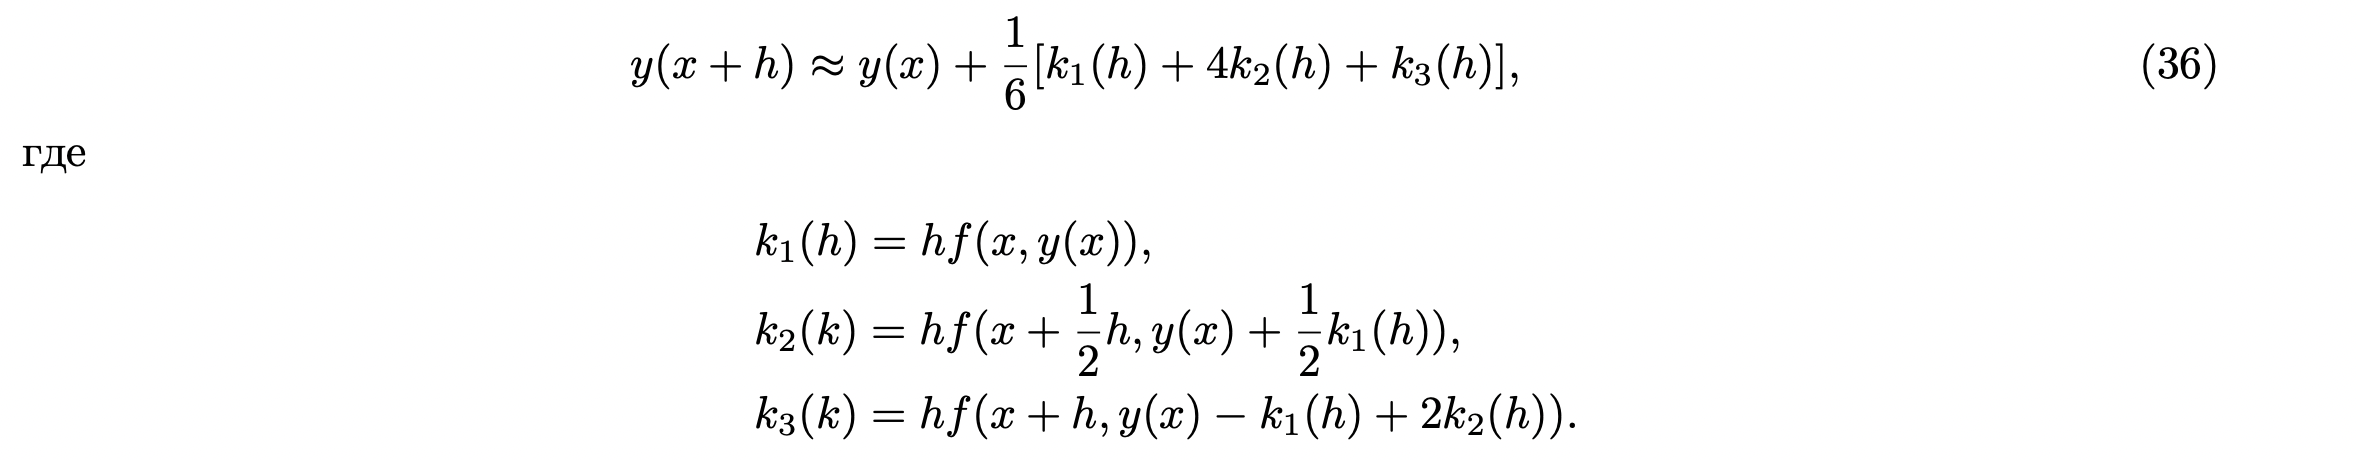

In [17]:
#Нахождение корректирующих коэффициентов k
def k_opp(num, h, y):
    if num == 11:
        return h*func(1, y)
       
    if num == 12:
        return h*func(1, y + 0.5*k(11, h, y))
    
    if num == 13:
        return h*func(1, y - k(11, h, y) + 2*k(12, h, y))
    
    
    if num == 21:
        return h*func(2, y)
    
    if num == 22:
        return h*func(2, y+0.5*k(21, h, y))
    
    if num == 23:
        return h*func(2, y - k(21, h, y) + 2*k(22, h, y))

### Метод Рунге-Кутты для оппонента с постоянным шагом

In [18]:
#Расчётная схема оппонента (36)
def opp_calc_scheme(h, y1, y2):
    #Число шагов, проходимых с помощью фиксированного шага
    num_steps = int(np.pi/h)  
    
    #Будем записывать полученные значения функций в точках разбиения для (3.2)
    y1_all = [y1]
    y2_all = [y2]
    
    for i in range(num_steps-1):    
        k11 = k_opp(11, h, y2)
        k12 = k_opp(12, h, y2)
        k13 = k_opp(13, h, y2)
        
        k21 = k_opp(21, h, y1)
        k22 = k_opp(22, h, y1)
        k23 = k_opp(23, h, y1)        

        y1_next = y1 + (k11 + 4*k12 + k13)/6
        y2_next = y2 + (k21 + 4*k22 + k23)/6
        
        y1_all.append(y1_next)
        y2_all.append(y2_next)        
        
        y1 = y1_next
        y2 = y2_next
        
    #Выбираем последний шаг и доходим до xk (меньше фиксированного)
    last_step = np.pi - h*num_steps
    
    k11 = k_opp(11, h, y2)
    k12 = k_opp(12, h, y2)
    k13 = k_opp(13, h, y2)

    k21 = k_opp(21, h, y1)
    k22 = k_opp(22, h, y1)
    k23 = k_opp(23, h, y1)        

    y1_last = y1 + (k11 + 4*k12 + k13)/6
    y2_last = y2 + (k21 + 4*k22 + k23)/6  

    y1_all.append(y1_last)
    y2_all.append(y2_last)
           
    return y1_last, y2_last, last_step, y1_all, y2_all

In [19]:
#Метод Рунге-Кутты для схемы оппонента
def opp_runge_kutta():
    y1_curr = y10
    y2_curr = y20
    R_wave = 10
    #Выбираем начальный шаг
    h = first_step(s_opp)
    
    while abs(R_wave) > eps:          
        y_line = opp_calc_scheme(h, y1_curr, y2_curr)
        y_wave = opp_calc_scheme(h/2, y1_curr, y2_curr)
        R_wave = total_err(y_line, y_wave)
        h = h/2
    
    #Итоговое решение
    y1 = y_wave[0] + R_wave
    y2 = y_wave[1] + R_wave
    print('y1 =', y1)
    print('y2 =', y2)
    print('Размер шага:', h)
    
    return y1, y2, h, y_wave[2], y_wave[3], y_wave[4]

In [20]:
#Вывод результатов
print('\n Решение системы дифференциальных уравнений:') 
ans2 = opp_runge_kutta()

print('\n Точное решение системы:')
print('y1 =', Y1[-1])
print('y2 =', Y2[-1])

print('\n Полная погрешность:')
print(abs(Y1[-1] - ans2[0]))
print(abs(Y2[-1] - ans2[1]))


 Решение системы дифференциальных уравнений:
y1 = 1.3580636062456473
y2 = -1.2876043426244053
Размер шага: 0.00021154260715221468

 Точное решение системы:
y1 = 1.357812280993508
y2 = -1.2877734484350638

 Полная погрешность:
0.00025132525213922285
0.00016910581065854302


### Метод Рунге-Кутты для оппонента с автоматически выбранным шагом

In [21]:
#Расчётная схема оппонента оценки локальной погрешности метода Рунге-Кутты
def opp_one_calc(h, y1, y2):
    y_line = []
    y_wave = []
    
    #Находим y_line проходом с шагом h
    k11 = k_opp(11, h, y2)
    k12 = k_opp(12, h, y2)
    k13 = k_opp(13, h, y2)

    k21 = k_opp(21, h, y1)
    k22 = k_opp(22, h, y1)
    k23 = k_opp(23, h, y1) 

    y_line.append(y1 + (k11 + 4*k12 + k13)/6)
    y_line.append(y2 + (k21 + 4*k22 + k23)/6)
    
    #Находим y_wave двойным проходом с шагом h/2
    for i in range(2):
        k11 = k_opp(11, h/2, y2)
        k12 = k_opp(12, h/2, y2)
        k13 = k_opp(13, h/2, y2)

        k21 = k_opp(21, h/2, y1)
        k22 = k_opp(22, h/2, y1)
        k23 = k_opp(23, h/2, y1) 
                
        y1_next = y1 + (k11 + 4*k12 + k13)/6
        y2_next = y2 + (k21 + 4*k22 + k23)/6 
        
        y1 = y1_next
        y2 = y2_next
        
    y_wave.append(y1_next)
    y_wave.append(y2_next)
    
    return y_line, y_wave

In [22]:
#Метод Рунге-Кутты с оптимальным шагом для схемы оппонента
def opp_runge_kutta_opt():
    x_curr = x0
    y1_curr = y10
    y2_curr = y20

    #Выбираем начальный шаг
    h = first_step(s_opp)
    
    #Будем сохранять все оптимальные шаги метода
    all_steps = []
    
    #Будем сохранять значения фукнций в оптимальных точках для точного решения системы
    all_y1 = [y1_curr]
    all_y2 = [y2_curr]
    
    #Сохранение оценок локальной погрешности
    all_errs = [0]

    while x_curr + h < xk:
        all_steps.append(h)
        
        x_curr = x_curr + h     
        y_line, y_wave = opp_one_calc(h, y1_curr, y2_curr)
        norm_r = loc_err(s_opp, y_line, y_wave)
        
        h, y1_curr, y2_curr = opt_step(s_opp, norm_r, h, y_wave, y_line)
        
        all_errs.append(norm_r)
        all_y1.append(y1_curr)
        all_y2.append(y2_curr)
        
    
    h = xk - x_curr    
    y_line, y_wave = opp_one_calc(h, y1_curr, y2_curr)
    norm_r = loc_err(s_opp, y_line, y_wave)
    
    #Итоговый ответ
    y1 = y_line[0] + norm_r
    y2 = y_line[1] + norm_r
    
    print('y1 =', y1)
    print('y2 =', y2)
    
    
    #Записываем последние значения 
    all_steps.append(h)
    all_y1.append(y1)
    all_y2.append(y2)
    all_errs.append(norm_r)  
    
    
    return y1, y2, all_steps, all_y1, all_y2, all_errs

In [23]:
#Вывод результатов для автоматического шага оппонента
print('\n Решение системы дифференциальных уравнений:') 
ans2_opt = opp_runge_kutta_opt()

print('\n Точное решение системы:')
print('y1 =', Y1[-1])
print('y2 =', Y2[-1])

print('\n Полная погрешность:')
print(abs(Y1[-1] - ans2_opt[0]))
print(abs(Y2[-1] - ans2_opt[1]))

#Все оценки погрешности
ans2_opt[-1]



 Решение системы дифференциальных уравнений:
y1 = 1.362656326545538
y2 = -1.2878458389556269

 Точное решение системы:
y1 = 1.357812280993508
y2 = -1.2877734484350638

 Полная погрешность:
0.004844045552029996
7.239052056307038e-05


[0,
 0.0005352839019350683,
 0.0001333469651943977,
 3.326531258256421e-05,
 8.30651311081828e-06,
 8.302689480159411e-06,
 8.298802433857221e-06,
 8.294852000085297e-06,
 8.290838209294273e-06,
 8.286761091377423e-06,
 8.282620676844232e-06,
 8.278416997153607e-06,
 8.274150083632897e-06,
 8.269819968452427e-06,
 8.265426684149474e-06,
 8.260970263813049e-06,
 8.256450741095156e-06,
 8.251868149801851e-06,
 8.247222524593405e-06,
 8.242513900342994e-06,
 8.237742312831237e-06,
 8.232907797637104e-06,
 8.228010391252628e-06,
 8.22305013083366e-06,
 8.218027053376368e-06,
 8.212941197103728e-06,
 8.207792600280685e-06,
 8.20258130143269e-06,
 8.197307340300748e-06,
 8.191970756370983e-06,
 8.186571590149036e-06,
 8.181109882336582e-06,
 8.175585673842574e-06,
 8.169999006696314e-06,
 8.164349923069902e-06,
 8.158638465550005e-06,
 8.152864676818483e-06,
 8.14702860113971e-06,
 8.141130282310275e-06,
 8.135169765045457e-06,
 8.129147093959715e-06,
 8.123062315037103e-06,
 8.1169154740600

### 3.2 Построение графика зависимости истинной полной погрешности от значения переменной х

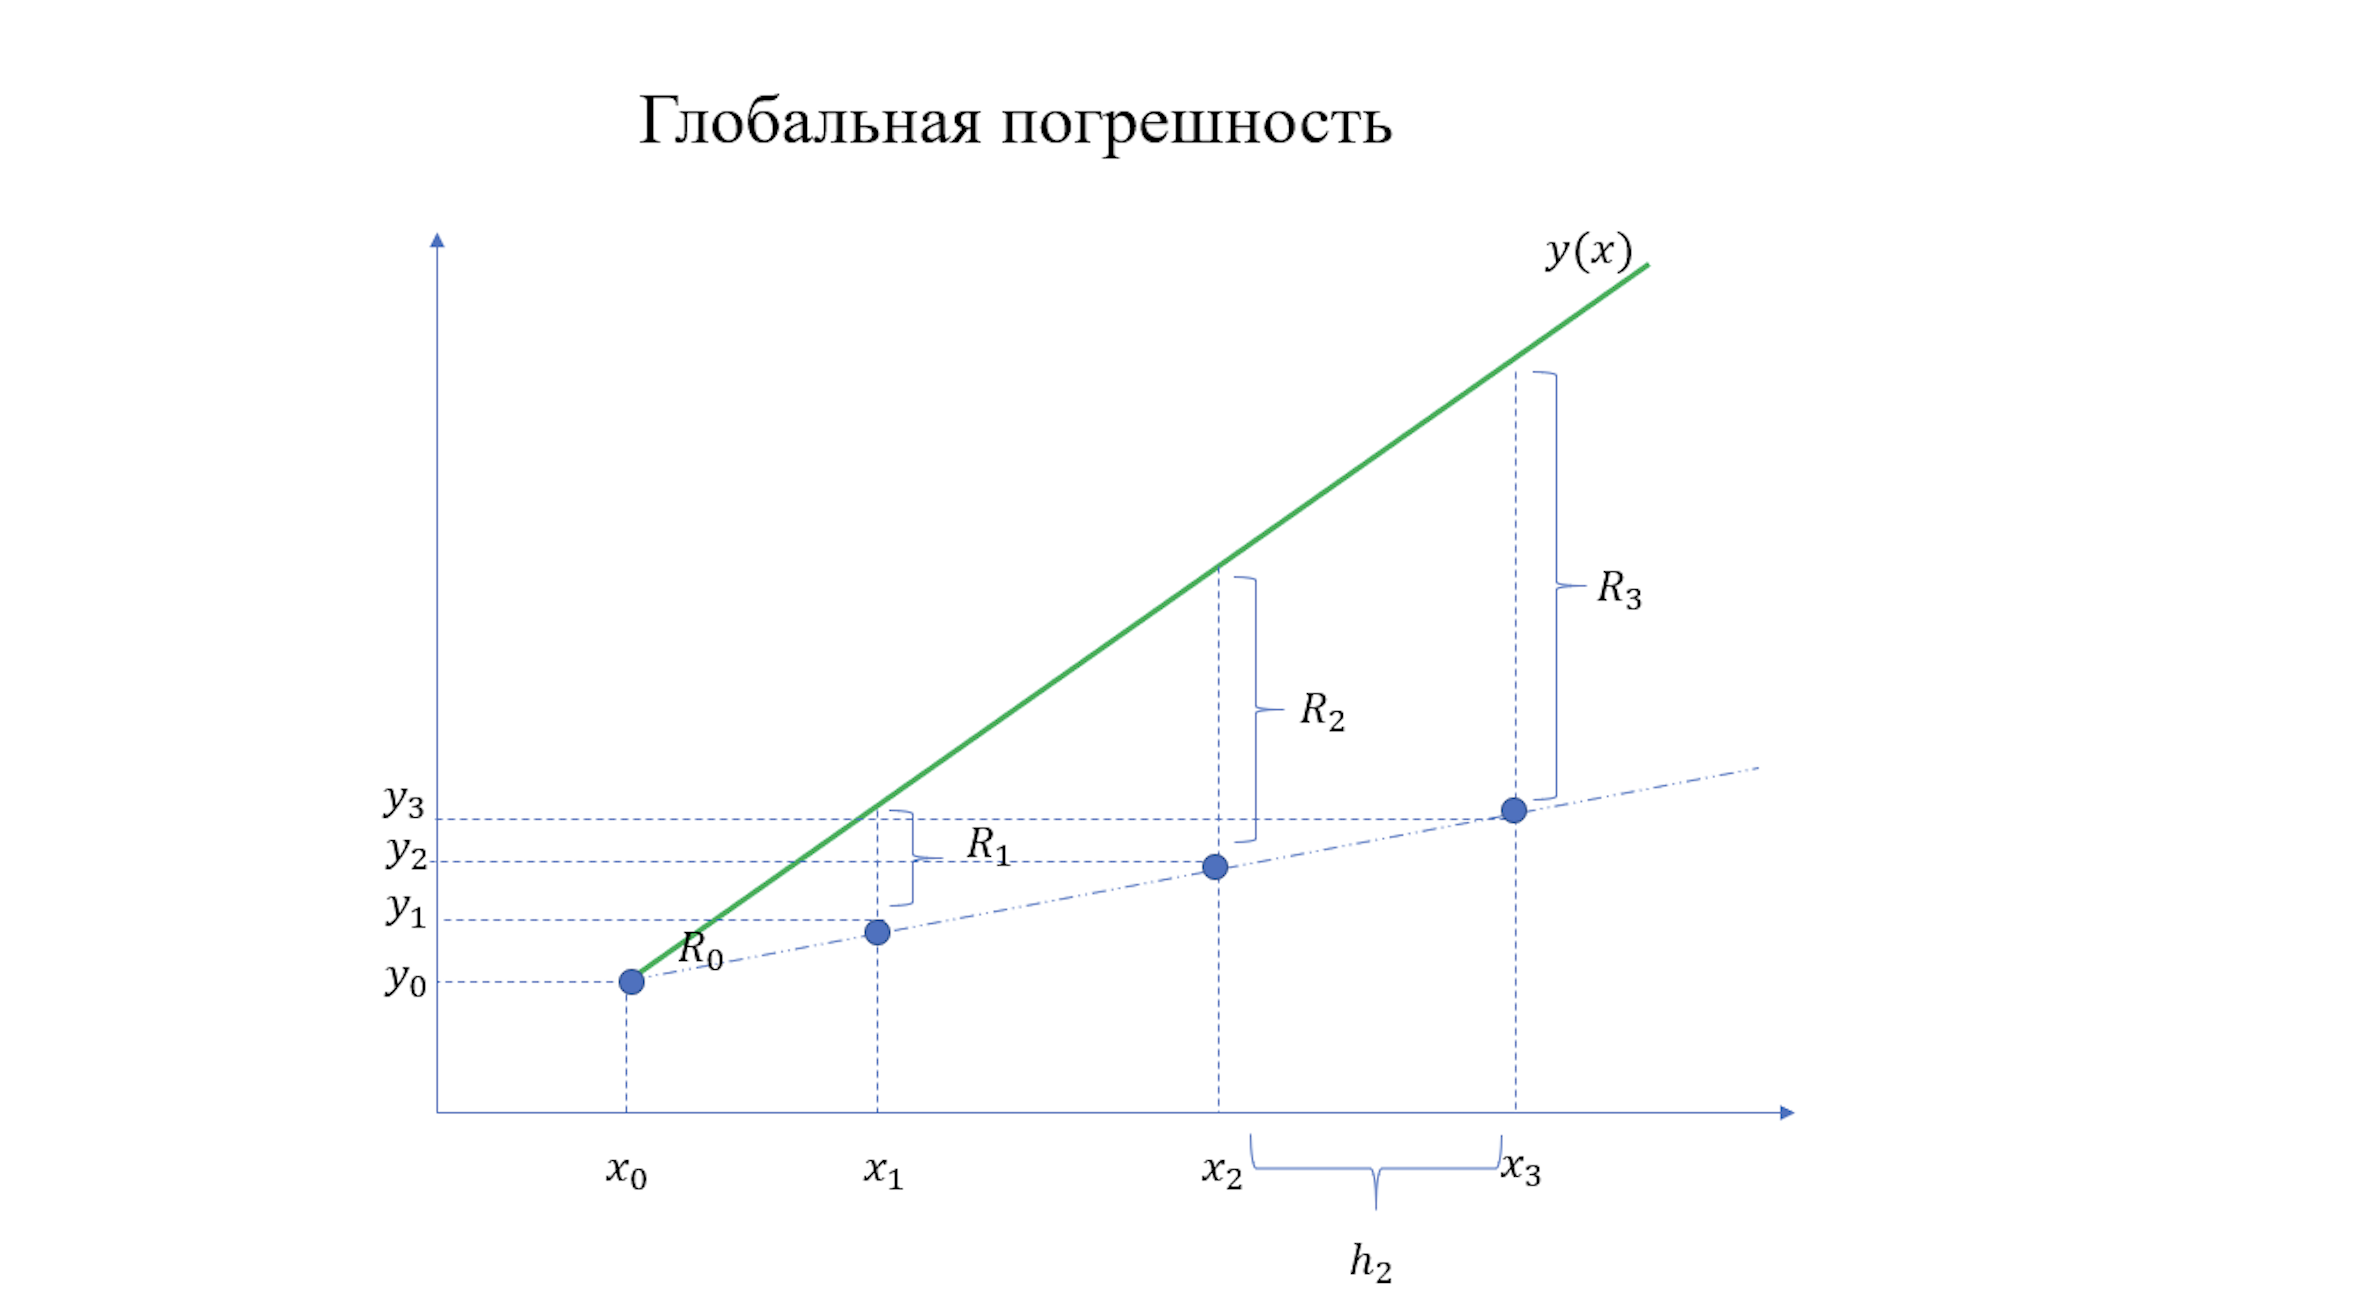

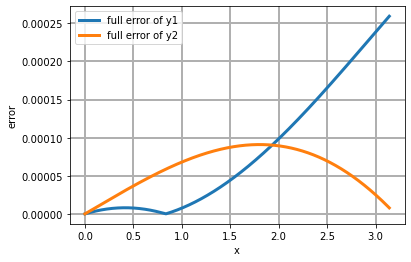

In [24]:
#Построение графика истинной полной погрешности для двухэтапного ЯМРК 2-го порядка

#Значение шага, при котором достигается заданная точность
h_const1 = ans1[2]

#Добавляем все рассматриваемые точки х в массив
x_const = np.linspace(0, np.pi - ans1[3], int((np.pi-ans1[3])/h_const1))
x_const = np.append(x_const, np.pi)

#Вычисление точных значений системы ДУ в данных точках
y_const = odeint(odes, init_cond, x_const)
Y1_precise = y_const[:, 0]
Y2_precise = y_const[:, 1]

#Массивы истинной полной погрешности для уравнений системы
err1_const = abs(Y1_precise-ans1[4])
err2_const = abs(Y2_precise-ans1[5])

#Построение графика истинной полной погрешности
plt.grid(linewidth = 2)
plt.xlabel('x')
plt.ylabel('error')
line1 = plt.plot(x_const, err1_const, label='full error of y1', linewidth = 3)
line2 = plt.plot(x_const, err2_const, label='full error of y2', linewidth = 3)
plt.legend()
plt.show()

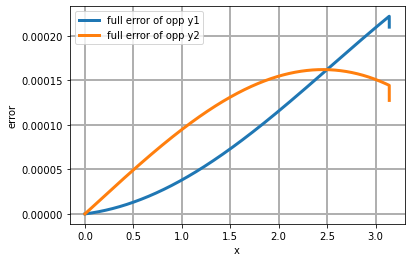

In [25]:
#Построение графика истинной полной погрешности схемы оппонента

#Значение шага, при котором достигается заданная точность
h_const2 = ans2[2]

#Добавляем все рассматриваемые точки х в массив
x_const2 = np.linspace(0, np.pi - ans2[3], int((np.pi-ans2[3])/h_const2))
x_const2 = np.append(x_const2, np.pi)

#Вычисление точных значений системы ДУ в данных точках
y_const2 = odeint(odes, init_cond, x_const2)
Y1_precise_opp = y_const2[:, 0]
Y2_precise_opp = y_const2[:, 1]

#Массивы истинной полной погрешности для уравнений системы
err1_const_opp = abs(Y1_precise_opp-ans2[4])
err2_const_opp = abs(Y2_precise_opp-ans2[5])


#Построение графика истинной полной погрешности
plt.grid(linewidth = 2)
plt.xlabel('x')
plt.ylabel('error')
line1 = plt.plot(x_const2, err1_const_opp, label='full error of opp y1', linewidth = 3)
line2 = plt.plot(x_const2, err2_const_opp, label='full error of opp y2', linewidth = 3)
plt.legend()
plt.show()

### 3.3 Построение графиков для схем с автоматическим выбором шага

#### 3.3.1 График зависимости величины шага интегрирования от значения независимой переменной х

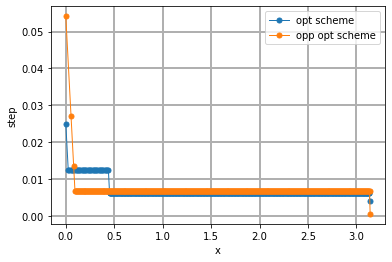

3.141592653589793

In [26]:
#Формируем листы с оптимальными шагами и точками х для реализованной схемы
opt_steps = ans1_opt[2]
opt_x = [0]
for i in range(len(opt_steps)):
    opt_x.append(opt_x[-1]+opt_steps[i])

#Формируем листы с оптимальными шагами и точками х для реализованной схемы оппонента    
opt_steps_opp = ans2_opt[2]
opt_x_opp = [0]
for i in range(len(opt_steps_opp)):
    opt_x_opp.append(opt_x_opp[-1]+opt_steps_opp[i])



#Вывод графиков
plt.grid(linewidth = 2)
plt.xlabel('x')
plt.ylabel('step')
line1 = plt.plot(opt_x[:-1], opt_steps, marker='o', markersize = 5, label='opt scheme', linewidth = 1)
line2 = plt.plot(opt_x_opp[:-1], opt_steps_opp, marker='o', markersize = 5, label='opp opt scheme', linewidth = 1)
plt.legend()
plt.show()

sum(opt_steps_opp)

#### 3.3.2 График зависимости отношения истинной локальной погрешности к оценке локальной погрешности от значения независимой переменной x

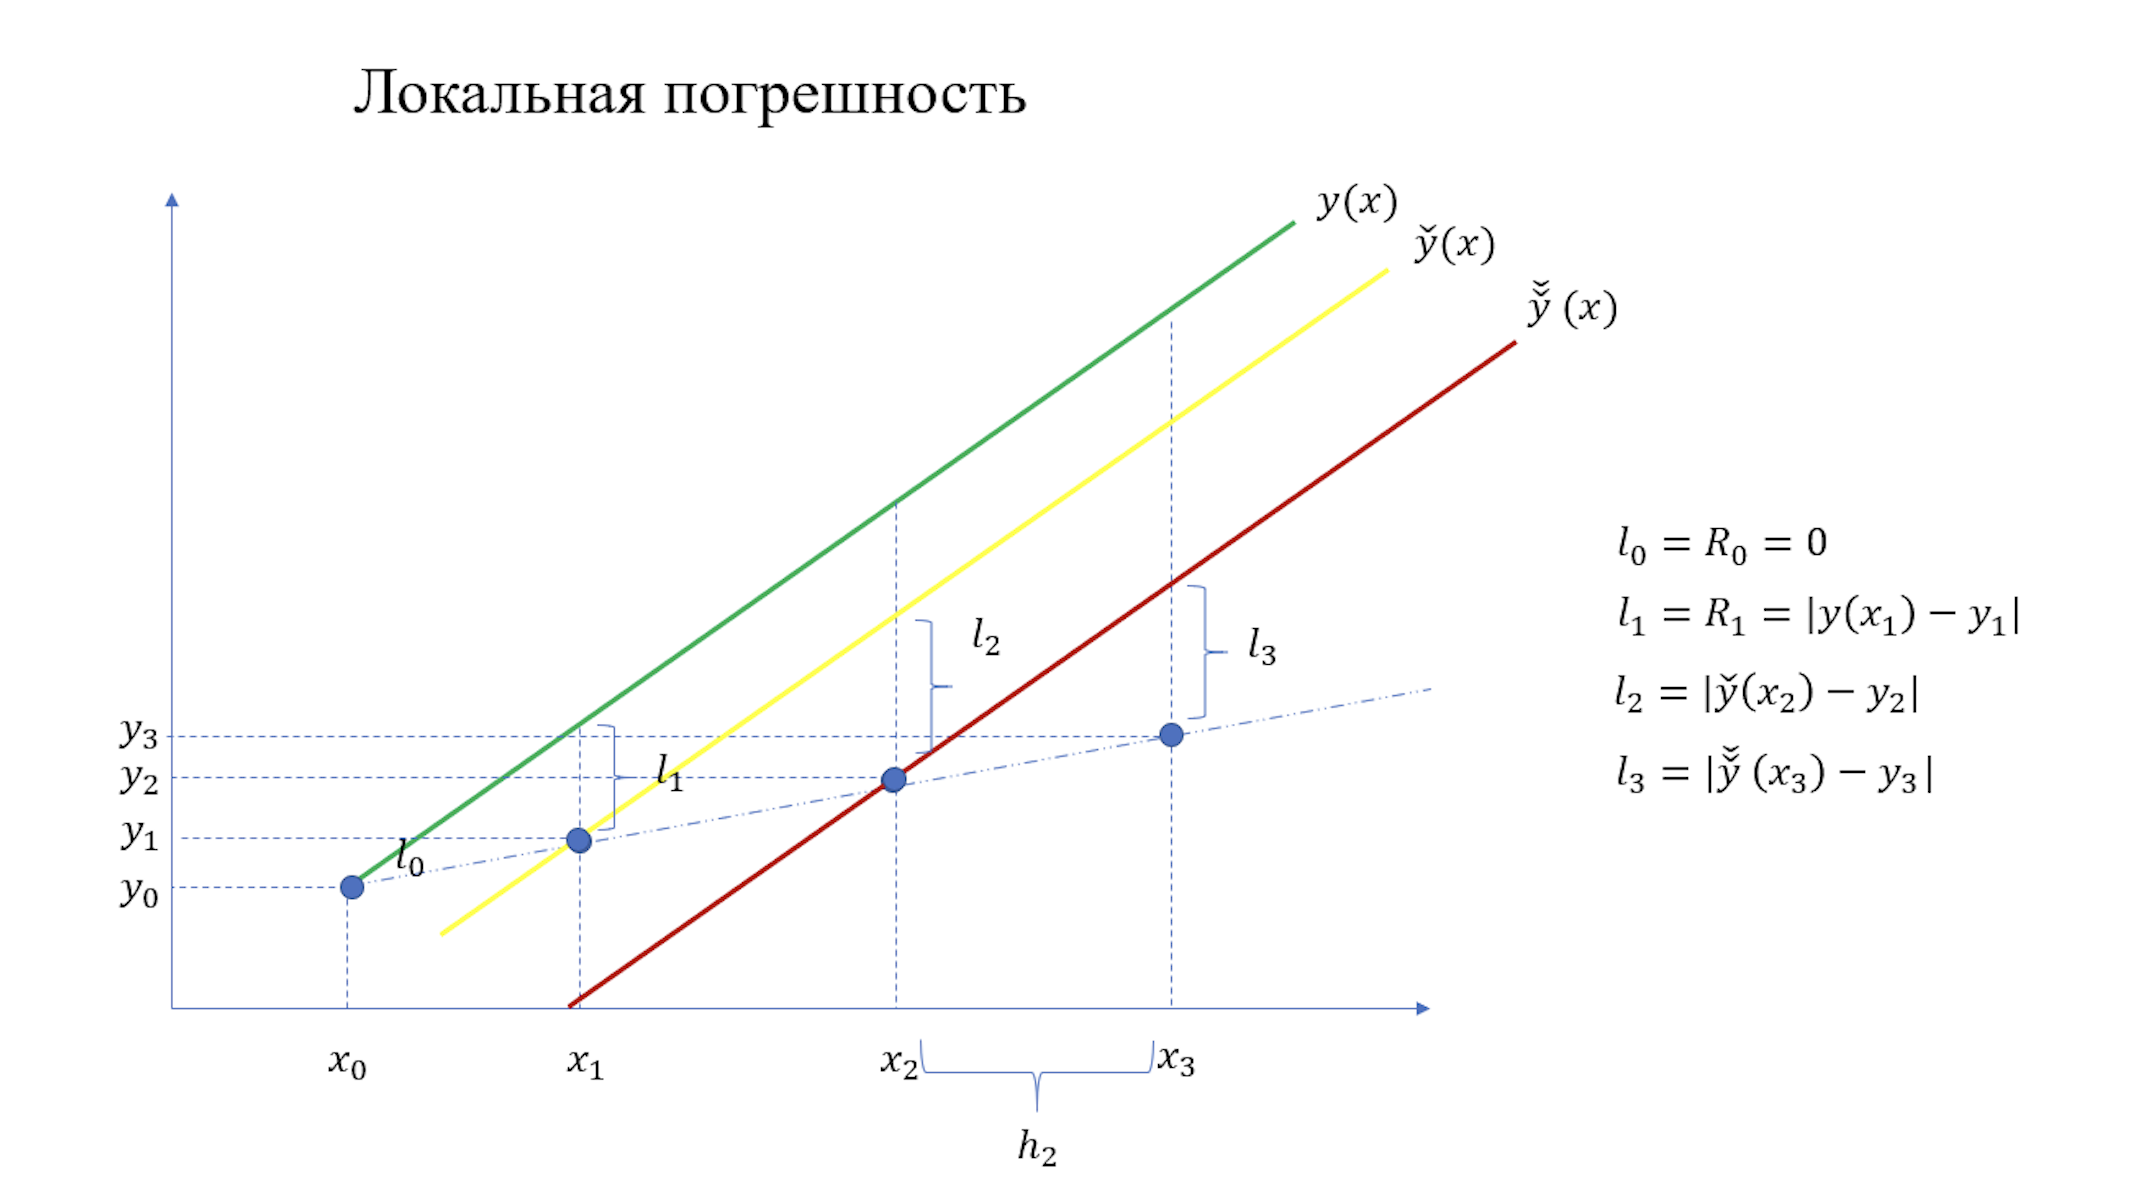

#### Построение графика для 2-х этапного ЯМРК 2-го порядка

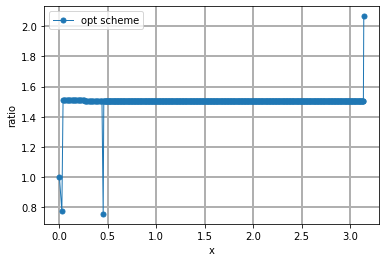

In [27]:
#Вводим необходимые данные для нахождения погрешности
all_y1 = ans1_opt[3]
all_y2 = ans1_opt[4]
loc_errs = ans1_opt[5]

x_all = opt_x

y1_loc_exact = [y10]
y2_loc_exact = [y20]


#Решаем нашу систему ДУ при различных начальных условиях
for i in range(len(x_all)-1):
    curr_init_cond = [all_y1[i], all_y2[i]]

    y_curr = odeint(odes, curr_init_cond, x_all[i:])
    Y1 = y_curr[1, 0]
    Y2 = y_curr[1, 1]
    
    y1_loc_exact.append(Y1)
    y2_loc_exact.append(Y2)
    


#Истинная локальная погрешность в оптимальных точках х
real_loc_err_y1 = []
real_loc_err_y2 = []
real_loc_err = []
for i in range(len(x_all)):
    real_loc_err_y1.append(abs(y1_loc_exact[i] - all_y1[i]))
    real_loc_err_y2.append(abs(y2_loc_exact[i] - all_y2[i]))
    
    real_loc_err.append(np.sqrt(real_loc_err_y1[i]**2+real_loc_err_y2[i]**2))
    

# print(len(x_all))
# print(len(y1_loc_exact))
# print(len(all_y1))

#Отношение истинной локальной погрешности к оценке локальной погрешности в точках х
err_ratio = [1]
for i in range(1, len(x_all)):
    err_ratio.append(abs(real_loc_err[i]/loc_errs[i]))


#Вывод графика отношения погрешностей 
plt.grid(linewidth = 2)
plt.xlabel('x')
plt.ylabel('ratio')

line1 = plt.plot(opt_x[:], err_ratio[:], marker='o', markersize = 5, label='opt scheme', linewidth = 1)
plt.legend()
plt.show()



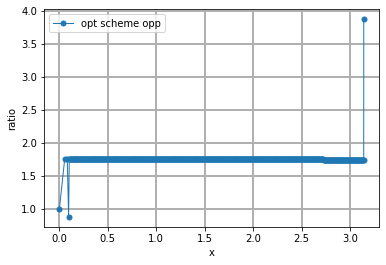

In [28]:
#Вводим необходимые данные для нахождения погрешности
all_y1_opp = ans2_opt[3]
all_y2_opp = ans2_opt[4]
loc_errs_opp = ans2_opt[5]
x_all_opp = opt_x_opp

y1_loc_exact_opp = [y10]
y2_loc_exact_opp = [y20]


#Решаем нашу систему ДУ при различных начальных условиях
for i in range(len(x_all_opp)-1):
    curr_init_cond = [all_y1_opp[i], all_y2_opp[i]]

    y_curr = odeint(odes, curr_init_cond, x_all_opp[i:])
    Y1 = y_curr[1, 0]
    Y2 = y_curr[1, 1]
    
    y1_loc_exact_opp.append(Y1)
    y2_loc_exact_opp.append(Y2)
    


#Истинная локальная погрешность в оптимальных точках х
real_loc_err_y1_opp = []
real_loc_err_y2_opp = []
real_loc_err_opp = []


for i in range(len(x_all_opp)):
    real_loc_err_y1_opp.append(abs(y1_loc_exact_opp[i] - all_y1_opp[i]))
    real_loc_err_y2_opp.append(abs(y2_loc_exact_opp[i] - all_y2_opp[i]))
    
    real_loc_err_opp.append(np.sqrt(real_loc_err_y1_opp[i]**2+real_loc_err_y2_opp[i]**2))
    


#Отношение истинной локальной погрешности к оценке локальной погрешности в точках х
err_ratio_opp = [1]
for i in range(1, len(x_all_opp)):
    err_ratio_opp.append(abs(real_loc_err_opp[i]/loc_errs_opp[i]))


#Вывод графика отношения погрешностей 
plt.grid(linewidth = 2)
plt.xlabel('x')
plt.ylabel('ratio')

line1 = plt.plot(opt_x_opp, err_ratio_opp, marker='o', markersize = 5, label='opt scheme opp', linewidth = 1)
plt.legend()
plt.show()


#### 3.3.3 Графики зависимости количества вычислений правой части системы от заданной точности eps

In [29]:
err_list = []
count_list = []
count_list_opp = []

err_list = np.linspace(10**(-4), 10**(-2), 20)

    
for i in err_list:
    counter = 0
    eps = i
    rho = i
    runge_kutta_opt()
    count_list.append(counter)
    
    counter = 0
    opp_runge_kutta_opt()
    count_list_opp.append(counter)

print(err_list)
print(count_list)
print(count_list_opp)

0.02509922271558178
y1 = 1.3604231025752698
y2 = -1.2988900533999674
y1 = 1.3660459085501797
y2 = -1.2871516291036513
0.04613562492837037
y1 = 1.366827114201269
y2 = -1.3180243745700226
y1 = 1.383477849086927
y2 = -1.2852111107380666
0.056523491826411094
y1 = 1.3688723888808707
y2 = -1.326311081307641
y1 = 1.387788877625344
y2 = -1.284692875913249
0.06406754748839408
y1 = 1.3703111978024864
y2 = -1.332958721976865
y1 = 1.3908160674765666
y2 = -1.284317641696062
0.07016035387219492
y1 = 1.3720612205162996
y2 = -1.3375069549360168
y1 = 1.3932366822032134
y2 = -1.2839767791154275
0.07534656275019103
y1 = 1.3732628690082946
y2 = -1.3444224469978492
y1 = 1.3953021512372632
y2 = -1.2836407146999795
0.07990290396254554
y1 = 1.3739254688348046
y2 = -1.3495239396698315
y1 = 1.4381936049557111
y2 = -1.2769123366337962
0.08399157718707803
y1 = 1.3750599120553646
y2 = -1.3537185503463884
y1 = 1.4414698871625946
y2 = -1.2762737766893446
0.08771678186821413
y1 = 1.3770905878257726
y2 = -1.3571120359

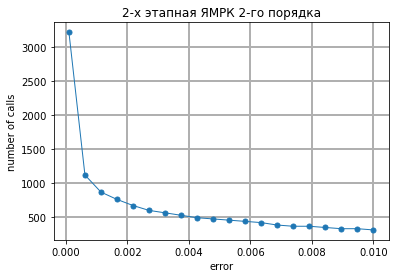

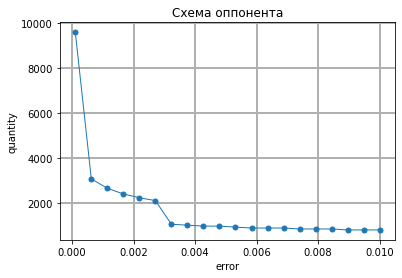

In [30]:
#Вывод графика зависимости
plt.title('2-х этапная ЯМРК 2-го порядка')
plt.grid(linewidth = 2)
plt.xlabel('error')
plt.ylabel('number of calls')
line1 = plt.plot(err_list, count_list, marker='o', markersize = 5, linewidth = 1)
plt.show()


plt.title('Схема оппонента')
plt.grid(linewidth = 2)
plt.xlabel('error')
plt.ylabel('quantity')
line2 = plt.plot(err_list, count_list_opp, marker='o', markersize = 5, linewidth = 1)
plt.show()